# Geosptial Analysis with GeoPandas

In [1]:
import geopandas as gpd
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
%matplotlib inline 

Check the version of GeoPandas. The version in your desktop should match the version below. 

In [2]:
#pros and cons 

In [3]:
gpd.__version__

'0.2.1'

# Installing GeoPandas

For Mac OS, use `pip install geopandas`. 

For Anacondnda installed in Windows, use `conda install -c conda-forge geopandas`.

# What is GeoPandas?

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow __spatial operations__ on geometric types. Geometric operations are performed by __shapely__. Geopandas further depends on __fiona__ for file access and __descartes__ and __matplotlib__ for plotting.

# GeoPandas vs. Pandas


In general, GeoPandas read spatial data into __GeoDataFrame__ (or __GeoSeries__) while Pandas read text data (most often) into __DataFrame__ (or __Series__). GeoDataFrame and DataFrame are highly comparable because common methods available to DataFrame can also be applied to GeoDataFrame. 

One major difference between GeoDataFrame and DataFrame is that GeoDataFrame must have a column which stores shapely geometric objects. Common Shapely geometric objects include __Point, Polygon, LineString__. Less common geometric objects are collection of objects like MultiPoint, MultiPolygon, MultiLineString. 

Below are a few examples of constructing Shaply geometric objects and accessing the common attributes of Shapely geometric objects. For full documentation of functions and attributes of Shapely objects, see http://toblerity.org/shapely/manual.html

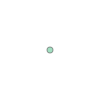

In [4]:
pt = Point((1,1))
pt

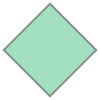

In [5]:
poly = Polygon([(1,0), (2,1), (1,2), (0,1)])
poly

In [6]:
poly.area

2.0

In [7]:
poly.bounds

(0.0, 0.0, 2.0, 2.0)

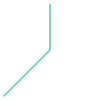

In [8]:
line = LineString([(0,0), (1,1), (1,2)])
line

In [9]:
line.length

2.414213562373095

# Read/Write  files

Geopandas can read almost any vector-based spatial data formate including widely used __ESRI shapefile, GeoJSON__ by command: `gpd.read_file()`. However, __KML__ is not supported by GeoPandas.

The following example is based on Census Tracts of Michigan, and shapefile can be downloaded from Census https://www.census.gov/geo/maps-data/data/cbf/cbf_tracts.html


### Read shapefile

In [10]:
#read shapefile in to GeoDataFrame
rel_path = "cb_2016_26_tract_500k"
filename = "cb_2016_26_tract_500k.shp"
shapefile = os.path.join(rel_path, filename)

In [11]:
mi_tract = gpd.read_file(shapefile)

In [12]:
#check the type 
type(mi_tract)

geopandas.geodataframe.GeoDataFrame

In [13]:
#look at first three records of the GeoDataFrame
mi_tract.head(3)

,AFFGEOID,ALAND,AWATER,COUNTYFP,GEOID,LSAD,NAME,STATEFP,TRACTCE,geometry
0,1400000US26081010402,9394238,21350,081,26081010402,CT,104.02,26,010402,"POLYGON ((-85.72590699999999 43.157824, -85.72..."
1,1400000US26081011002,13996306,507703,081,26081011002,CT,110.02,26,011002,"POLYGON ((-85.580247 43.104607, -85.579931 43...."
2,1400000US26081011902,13122288,606567,081,26081011902,CT,119.02,26,011902,"POLYGON ((-85.55091 42.963333, -85.546115 42.9..."


# Inspect the column that stores geometric objects

In [14]:
#identify the column's name which stores the geometric objects, if any. 
mi_tract.geometry.name

'geometry'

Currently, the geometric objects are stored in a column named geometry. Please note that this column does not have be named as geometry. You might rename the "geometry" column to other names that makes sense to you. However, when you do some geometric operations like spatial join, the name of the column which stores geometric objects has to be __"geometry"__.

In [15]:
mi_tract = mi_tract.rename(columns= {"geometry":"Tract"}).set_geometry("Tract")

In [16]:
mi_tract.head(3)

,AFFGEOID,ALAND,AWATER,COUNTYFP,GEOID,LSAD,NAME,STATEFP,TRACTCE,Tract
0,1400000US26081010402,9394238,21350,081,26081010402,CT,104.02,26,010402,"POLYGON ((-85.72590699999999 43.157824, -85.72..."
1,1400000US26081011002,13996306,507703,081,26081011002,CT,110.02,26,011002,"POLYGON ((-85.580247 43.104607, -85.579931 43...."
2,1400000US26081011902,13122288,606567,081,26081011902,CT,119.02,26,011902,"POLYGON ((-85.55091 42.963333, -85.546115 42.9..."


In [17]:
mi_tract.geometry.name

'Tract'

In [18]:
mi_tract.dtypes #check data type, and note that GEOID is string instead of integer (shapefile)

AFFGEOID    object
ALAND        int64
AWATER       int64
COUNTYFP    object
GEOID       object
LSAD        object
NAME        object
STATEFP     object
TRACTCE     object
Tract       object
dtype: object

Common indexing or query methods from Pandas

In [19]:
mi_tract_id = mi_tract.set_index("GEOID")

when we set index in DataFrame or GeoDataFrame, pay attention to its dtype.

In [20]:
mi_tract_id.ix["26081011902"] #Series instead of GeoSeries

AFFGEOID                                 1400000US26081011902
ALAND                                                13122288
AWATER                                                 606567
COUNTYFP                                                  081
LSAD                                                       CT
NAME                                                   119.02
STATEFP                                                    26
TRACTCE                                                011902
Tract       POLYGON ((-85.55091 42.963333, -85.546115 42.9...
Name: 26081011902, dtype: object

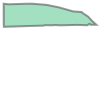

In [21]:
#inspect the geometry
mi_tract_id.ix["26081011902"].Tract

In [22]:
#do query on certain columns
tract_query = mi_tract[mi_tract.GEOID == "26081011902"]

In [23]:
tract_query 

,AFFGEOID,ALAND,AWATER,COUNTYFP,GEOID,LSAD,NAME,STATEFP,TRACTCE,Tract
2,1400000US26081011902,13122288,606567,081,26081011902,CT,119.02,26,011902,"POLYGON ((-85.55091 42.963333, -85.546115 42.9..."


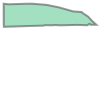

In [24]:
tract_query.geometry.iloc[0]

In [29]:
mi_tract

,AFFGEOID,ALAND,AWATER,COUNTYFP,GEOID,LSAD,NAME,STATEFP,TRACTCE,Tract
0,1400000US26081010402,9394238,21350,081,26081010402,CT,104.02,26,010402,"POLYGON ((-85.72590699999999 43.157824, -85.72..."
1,1400000US26081011002,13996306,507703,081,26081011002,CT,110.02,26,011002,"POLYGON ((-85.580247 43.104607, -85.579931 43...."
2,1400000US26081011902,13122288,606567,081,26081011902,CT,119.02,26,011902,"POLYGON ((-85.55091 42.963333, -85.546115 42.9..."
3,1400000US26081012400,2090674,0,081,26081012400,CT,124,26,012400,"POLYGON ((-85.629823 42.955493, -85.624612 42...."
4,1400000US26081013500,3018558,6150,081,26081013500,CT,135,26,013500,"POLYGON ((-85.70577299999999 42.928144, -85.70..."
5,1400000US26081014703,2465868,0,081,26081014703,CT,147.03,26,014703,"POLYGON ((-85.663738 42.85493, -85.644626 42.8..."
6,1400000US26087331500,48362308,3010798,087,26087331500,CT,3315,26,331500,"POLYGON ((-83.460005 43.179648, -83.4291849999..."
7,1400000US26091061200,88703905,514576,091,26091061200,CT,612,26,061200,"POLYGON ((-84.004935 41.904508, -84.004655 41...."
8,1400000US26091061600,4358413,0,091,26091061600,CT,616,26,061600,"POLYGON ((-84.058105 41.889175, -84.0533499999..."
9,1400000US26093713700,13211988,309709,093,26093713700,CT,7137,26,713700,"POLYGON ((-83.797195 42.631259, -83.749871 42...."


In [31]:
#do query for census tracts in Washtenaw County
tract_washtenaw= mi_tract[mi_tract.GEOID.astype(np.int64)//1000000 == 26161]

Or, you can simply inspect the geometric objects by plotting it using  the __plot__ function.

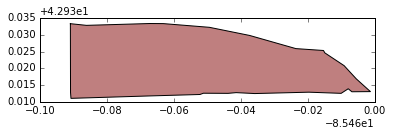

In [32]:
tract_query.plot() # color, linewidth, and transparency can be easily changed

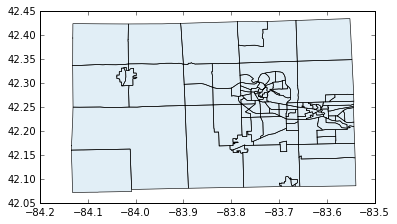

In [33]:
#more customized matploblib options 
tract_washtenaw.plot(color = "#6baed6", 
                linewidth = 0.6,
                linestyle = "-", 
                alpha = 0.2)

# Projection 

## coordinate reference system

Before spatial join or other sptial operations, it is always safer to project GeoDataFrames or GeoSeries to the same Coordinate Reference System beforehand.

Coordinate Reference System (CRS) are referred to using codes called __proj4__ strings. One can find commonly used code from http://spatialreference.org. 

For example, __NAD83__ can referred to by proj4 string __`"+proj=longlat +ellps=GRS80 +datum=NAD83 +no_defs"`__. Also, commonly used projection can be referred by EPSG code, e.g., __`"+init=epsg:4269"`__ and __`{"init": "epsg:4269"}`__ also refers to __NAD83__.

In [34]:
mi_tract.crs

{'init': 'epsg:4269'}

## Converting text file with coordinates to GeoDataFrame using Shapely

We have seen how to read vector-based sptial data into GeoDataFrame. 
But sometimes, the data we can get from the web is in text format. 
The following example shows how to convert text file with coordinates to GeoDataFrame using Shapely, and define the coordinate reference system. 

In [35]:
crash_df = pd.read_csv("crash_data.csv", index_col=0) #coordinate system is WGS 84
crash_df.head(3)

,crnt_x_cord,crnt_y_cord
0,-83.33060,44.42040
1,-83.43974,42.28007
2,-85.66040,42.95941


In [36]:
#rename the columns
crash_df.rename(columns={"crnt_x_cord":"lng", "crnt_y_cord": "lat"}, inplace= True)
crash_df.head(3)

,lng,lat
0,-83.33060,44.42040
1,-83.43974,42.28007
2,-85.66040,42.95941


In [37]:
type(crash_df)

pandas.core.frame.DataFrame

Originally, the data is read into pandas DataFrame, and coordinates are stored in columns __lng__ and __lat__, and we want to covert them into Shapely geometric objects.

In [38]:
#create shapely Point object based on lattitude and longtitude
geometry = [Point(x,y) for x,y in zip(crash_df.lng, crash_df.lat)]#list comprehension
crash_df = gpd.GeoDataFrame(crash_df, geometry=geometry) 

In [39]:
crash_df.head(3)

,lng,lat,geometry
0,-83.33060,44.42040,POINT (-83.3306 44.4204)
1,-83.43974,42.28007,POINT (-83.43974 42.28007)
2,-85.66040,42.95941,POINT (-85.6604 42.95941)


In [40]:
type(crash_df)

geopandas.geodataframe.GeoDataFrame

Define coordiante reference system (CRS) by assigning a coordinate reference system to GeoDataFrame's crs attribute.

In [41]:
crs = {'init': 'epsg:4326'} #WGS 84
crash_df.crs = crs

In [42]:
#check its projection 
crash_df.crs

{'init': 'epsg:4326'}

In [43]:
#changes to epsg 

In [44]:
#project to NAD83(HARN) / Michigan South (ft)
crs = {"init": "epsg:2898"}
mi_tract_prj = mi_tract.to_crs(crs)
crash_prj = crash_df.to_crs(crs)

In [45]:
print (mi_tract_prj.crs, end= "\n")
print (crash_prj.crs)

{'init': 'epsg:2898'}
{'init': 'epsg:2898'}


In [46]:
crash_prj.head(3)

,lng,lat,geometry
0,-83.33060,44.42040,POINT (13394127.19305227 1066095.590045435)
1,-83.43974,42.28007,POINT (13374194.47234064 285661.6698928802)
2,-85.66040,42.95941,POINT (12777074.19198516 534510.1330855159)


# Export file

Multiple formats are supported by geopandas as long as they are supported by fiona. We can check drivers supported by 

In [48]:
import fiona
print (fiona.supported_drivers)

{'GPSTrackMaker': 'raw', 'Idrisi': 'r', 'DGN': 'raw', 'ESRI Shapefile': 'raw', 'OpenFileGDB': 'r', 'GPKG': 'rw', 'GeoJSON': 'rw', 'DXF': 'raw', 'GPX': 'raw', 'BNA': 'raw', 'SEGY': 'r', 'MapInfo File': 'raw', 'ARCGEN': 'r', 'AeronavFAA': 'r', 'PCIDSK': 'r', 'SUA': 'r'}


In [49]:
#mi_tract_prj.to_file("mi_tract.geojson", driver= "GeoJSON")

In [50]:
# crash_prj.to_file("crash.geojson", driver= "GeoJSON")

Or, simply use to_json method of the GeoDataFrame

In [51]:
# crash_prj.to_json("crash.geojson")

**Tip**: Certain data types are not supported by Fiona, e.g., Bool, TimeStamp. (shapefile)

# Join/Spatial Join

## Join

__Join__ can be very useful when we need to add information to geometric objects based on certain relationship and do further analysis with the results. The example below shows how we can visulize population density with Pandas join function.  

Population data can be downloaded from American Factfinder at: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_15_5YR_B01003&prodType=table 

In [52]:
pop_file = "ACS_15_5YR_B01003/ACS_15_5YR_B01003_with_ann.csv"
pop_df = pd.read_csv(pop_file, skiprows=[1]) #skip the second row, which is redundant
pop_df.rename(columns= {"HD01_VD01": "Total_Pop", "HD02_VD01":"Margin_of_Error"}, inplace= True)

In [53]:
pop_df.head(3)#

,GEO.id,GEO.id2,GEO.display-label,Total_Pop,Margin_of_Error
0,1400000US26001000100,26001000100,"Census Tract 1, Alcona County, Michigan",1770,115
1,1400000US26001970100,26001970100,"Census Tract 9701, Alcona County, Michigan",2378,100
2,1400000US26001970400,26001970400,"Census Tract 9704, Alcona County, Michigan",2821,141


In [54]:
mi_tract_prj.head(2)

,AFFGEOID,ALAND,AWATER,COUNTYFP,GEOID,LSAD,NAME,STATEFP,TRACTCE,Tract
0,1400000US26081010402,9394238,21350,081,26081010402,CT,104.02,26,010402,"POLYGON ((12760709.21192099 607088.7715100877,..."
1,1400000US26081011002,13996306,507703,081,26081011002,CT,110.02,26,011002,"POLYGON ((12799289.42944052 587101.7720339784,..."


Join population table to Census Tract's GeoDataFrame based on their "__GEO IDs__", which is stored in __"GEOID"__ and __"GEO.id2"__ respectively.

In [55]:
#check the data types
pop_df.dtypes

GEO.id               object
GEO.id2               int64
GEO.display-label    object
Total_Pop             int64
Margin_of_Error       int64
dtype: object

In [56]:
mi_tract_prj.dtypes #different data types for GEO.id2 and GEOID

AFFGEOID    object
ALAND        int64
AWATER       int64
COUNTYFP    object
GEOID       object
LSAD        object
NAME        object
STATEFP     object
TRACTCE     object
Tract       object
dtype: object

In [57]:
pop_df.set_index("GEO.id2", inplace= True)

In [58]:
tract_pop = mi_tract_prj.join(pop_df, on = mi_tract_prj.GEOID.astype(np.int64) ,how= "left")

In [59]:
tract_pop.head(3)

,AFFGEOID,ALAND,AWATER,COUNTYFP,GEOID,LSAD,NAME,STATEFP,TRACTCE,Tract,GEO.id,GEO.display-label,Total_Pop,Margin_of_Error
0,1400000US26081010402,9394238,21350,081,26081010402,CT,104.02,26,010402,"POLYGON ((12760709.21192099 607088.7715100877,...",1400000US26081010402,"Census Tract 104.02, Kent County, Michigan",4071,143
1,1400000US26081011002,13996306,507703,081,26081011002,CT,110.02,26,011002,"POLYGON ((12799289.42944052 587101.7720339784,...",1400000US26081011002,"Census Tract 110.02, Kent County, Michigan",3755,163
2,1400000US26081011902,13122288,606567,081,26081011902,CT,119.02,26,011902,"POLYGON ((12806398.77235732 535508.4179187827,...",1400000US26081011902,"Census Tract 119.02, Kent County, Michigan",7300,256


Next, we will calculate the population density for each Census Tract.

In [60]:
tract_pop["Pop_den"] = tract_pop.apply(lambda x: x.Total_Pop / (x.Tract.area / 2.788e+7), axis= 1) 
#number of person / sq.mile

### Making choropleth map with GeoPandas

With the results, it is easy to make a quick and dirty choropleth map with GeoPandas.

(13180000.0, 13360000.0, 200000.0, 360000.0)

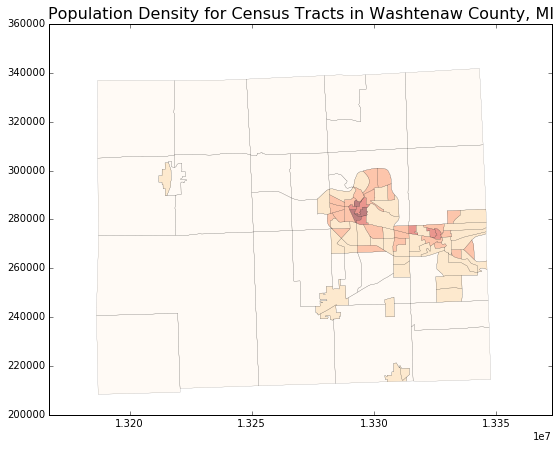

In [62]:
fig, ax0 = plt.subplots(1, 1, figsize = (9,7))
#select Census Tract in Washtenaw County 
wt_county = tract_pop[tract_pop.GEOID.astype(np.int64) // 1000000 == 26161]
wt_county.plot(ax = ax0, 
               column = "Pop_den", 
               cmap = "OrRd", 
               scheme= "fisher_jenks", # other options including "fisher_jenks", "equal_interval"
               linewidth = 0.1, 
               )
ax0.set_title("Population Density for Census Tracts in Washtenaw County, MI", fontsize = 16)
plt.axis("equal")

## Spatial Join

In comparison, __spatial join__ is to join two geometric object based on their sptial locations. GeoPandas can readily spatial join two geometric obejcts using the __sjoin__ function. The example below spatial join census tract with crash locations. The aim is to find out which census tract has the highest crash density.

In addition, __"op"__ specifies the relationship between the first and second geometric object. The options can be __"within", "contains" or "intersects"__. Pay attention to the sequence of objects and the option when do spatial join. 

However, please note that to do spatial join, the geometric objects have to be stored in column with a "geometry".

In [63]:
mi_tract_prj = mi_tract_prj.rename(columns={"Tract": "geometry"}).set_geometry("geometry")

### Difference between Intersects, within and contains 

In [64]:
a = gpd.GeoDataFrame({"id_pt": [1, 2], "geometry": [Point([1, 1]), Point([2, 2])]})
b = gpd.GeoDataFrame({"id_poly": 1, "geometry": [Polygon([(1, 1), (3, 1), (3, 3), (1 ,3)])]})

(0, 4)

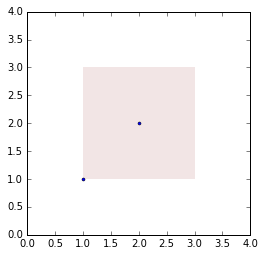

In [65]:
base = b.plot(alpha = 0.1, linewidth = 0)
a.plot(ax = base, color = "blue", markersize = 3)
base.set_xlim(0, 4)
base.set_ylim(0, 4)

In [66]:
gpd.sjoin(a, b, op= "within") #returns 1 point 

,geometry,id_pt,index_right,id_poly
1,POINT (2 2),2,0,1


In [67]:
gpd.sjoin(a, b, op= "intersects") #returns 2 points

,geometry,id_pt,index_right,id_poly
0,POINT (1 1),1,0,1
1,POINT (2 2),2,0,1


In [68]:
gpd.sjoin(a, b, op= "contains") #returns 0 points

,geometry,id_pt,index_right,id_poly


### Sequece of the input objects

In [69]:
gpd.sjoin(b, a, op= "within")

,geometry,id_poly,index_right,id_pt


In [70]:
gpd.sjoin(b, a, op= "contains")

,geometry,id_poly,index_right,id_pt
0,"POLYGON ((1 1, 3 1, 3 3, 1 3, 1 1))",1,1,2


In [71]:
gpd.sjoin(b, a, op= "intersects")

,geometry,id_poly,index_right,id_pt
0,"POLYGON ((1 1, 3 1, 3 3, 1 3, 1 1))",1,0,1
0,"POLYGON ((1 1, 3 1, 3 3, 1 3, 1 1))",1,1,2


Spatial join crash to Census Tract to identify crashes located in Washtenaw County

In [73]:
crash_tract = gpd.sjoin(crash_prj, mi_tract_prj, op= "within", how = "inner")
crash_wash = crash_tract[crash_tract.GEOID.astype(np.int64) // 1000000 == 26161]

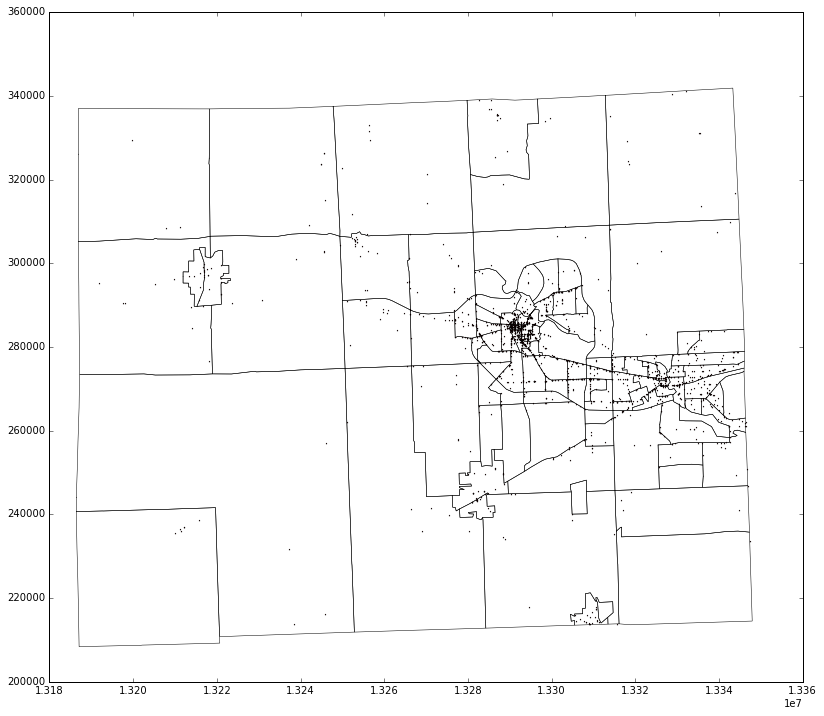

In [74]:
#plot the crash locations 
base = wt_county.plot(figsize = (16, 12), color = "white", linewidth = 0.5)
crash_wash.plot(ax = base, marker = "^", markersize = 1, color = "red")

Apply spatial join to crash data and Census Tract to investigate the crash density for each Census Tract in Michigan.

In [75]:
tract_crash = gpd.sjoin(mi_tract_prj, crash_prj, op= "contains", how = "inner")

In [76]:
tract_crash.head(3)

,AFFGEOID,ALAND,AWATER,COUNTYFP,GEOID,LSAD,NAME,STATEFP,TRACTCE,geometry,index_right,lng,lat
0,1400000US26081010402,9394238,21350,081,26081010402,CT,104.02,26,010402,"POLYGON ((12760709.21192099 607088.7715100877,...",13462,-85.692548,43.146000
0,1400000US26081010402,9394238,21350,081,26081010402,CT,104.02,26,010402,"POLYGON ((12760709.21192099 607088.7715100877,...",8147,-85.711531,43.146246
0,1400000US26081010402,9394238,21350,081,26081010402,CT,104.02,26,010402,"POLYGON ((12760709.21192099 607088.7715100877,...",3905,-85.710042,43.148626


Based on the result of sptial join, we can do more analysis. The code below demonstrates how to calculate crash density for Census Tract in Washtenaw County.

In [79]:
#area in square miles
tract_crash["area_sqm"]  = tract_crash.area /2.788e+7
#define a function that can calculate the crash density for a certain group
def crash_rate(group):
    return (len(group) / np.unique(group["area_sqm"].values)[0])
crash_den = tract_crash.groupby("GEOID").apply(crash_rate) #groupby by Census Block Group ID

In [80]:
#sort the crash density
crash_den = crash_den.sort_values(ascending= False)
crash_den_wash = crash_den.ix[crash_den.index.astype(np.int64) // 1000000 == 26161] #Washtenaw County only

In [81]:
crash_by_tract = wt_county.join(crash_den_wash.rename("Crash_den"), on= "GEOID")
crash_by_tract = crash_by_tract.fillna(0)

In [82]:
crash_by_tract.head(3)

,AFFGEOID,ALAND,AWATER,COUNTYFP,GEOID,LSAD,NAME,STATEFP,TRACTCE,Tract,GEO.id,GEO.display-label,Total_Pop,Margin_of_Error,Pop_den,Crash_den
91,1400000US26161402100,1431786,110270,161,26161402100,CT,4021,26,402100,"POLYGON ((13291532.03294382 293472.1427140213,...",1400000US26161402100,"Census Tract 4021, Washtenaw County, Michigan",2682,224,4466.943892,34.976071
92,1400000US26161404600,3657478,0,161,26161404600,CT,4046,26,404600,"POLYGON ((13292879.37046393 278578.1263678111,...",1400000US26161404600,"Census Tract 4046, Washtenaw County, Michigan",4575,339,3235.228096,24.043225
93,1400000US26161407600,2041815,10551,161,26161407600,CT,4076,26,407600,"POLYGON ((13330173.70510176 278562.805373129, ...",1400000US26161407600,"Census Tract 4076, Washtenaw County, Michigan",3060,257,3851.297795,5.034376


(13180000.0, 13360000.0, 200000.0, 360000.0)

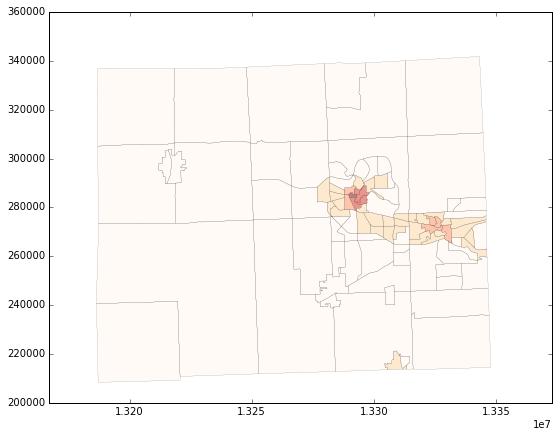

In [83]:
#plot census tract based crash density 
fig, ax0 = plt.subplots(1, 1, figsize = (9,7))
crash_by_tract.plot(ax = ax0,
               column = "Crash_den", 
               cmap = "OrRd", 
               scheme= "fisher_jenks", # other options including "fisher_jenks", "equal_interval"
               linewidth = 0.1, )
plt.axis("equal")

## More geometric operations

So far, we have worked with two geometric objects, Polygon and Point. Next, we will work on LineString. The road way data we use can be downloaded from Census at __ftp://ftp2.census.gov/geo/tiger/TIGER2016/Roads__

In [85]:
#read roadway shapefile into GeoDataFrame
road = gpd.read_file("tl_2016_26161_roads/tl_2016_26161_roads.shp")

In [87]:
road.shape

(8372, 5)

In [88]:
road.head(3)

,FULLNAME,LINEARID,MTFCC,RTTYP,geometry
0,I- 94 Bus Lp,1104485961480,S1200,I,"LINESTRING (-83.684012 42.254648, -83.683662 4..."
1,I- 94 Bus Lp,110449463442,S1200,I,"LINESTRING (-83.73551299999998 42.281354, -83...."
2,I- 94 Bus Lp,1104485961481,S1200,I,"LINESTRING (-83.732568 42.27600899999999, -83...."


In [89]:
#project to NAD83(HARN) / Michigan South (ft)
road_prj = road.to_crs(crs)

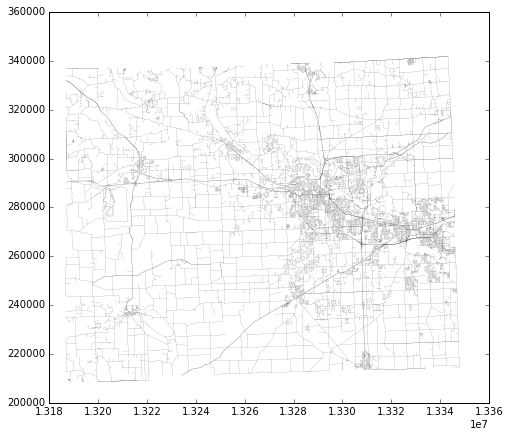

In [90]:
#do a quick plot to see what it looks like
road_prj.plot(color = "black", linewidth = 0.1, figsize= (10, 7))

### Buffer

In [91]:
road_buffer = road_prj.buffer(490) #create 150 meters buffer 

In [92]:
road_buffer.head(3) #other attributes are losing 

0    POLYGON ((13307780.22625757 275467.9532211132,...
1    POLYGON ((13294211.3957855 284892.6783476528, ...
2    POLYGON ((13295347.32603261 283754.9676883623,...
dtype: object

In [93]:
#fix by assigning buffered geometric objects to geometry
road_buffer = road_prj.copy()
road_buffer["geometry"] = road_prj.buffer(490)

In [94]:
road_buffer.head(3)

,FULLNAME,LINEARID,MTFCC,RTTYP,geometry
0,I- 94 Bus Lp,1104485961480,S1200,I,"POLYGON ((13307780.22625757 275467.9532211132,..."
1,I- 94 Bus Lp,110449463442,S1200,I,"POLYGON ((13294211.3957855 284892.6783476528, ..."
2,I- 94 Bus Lp,1104485961481,S1200,I,"POLYGON ((13295347.32603261 283754.9676883623,..."


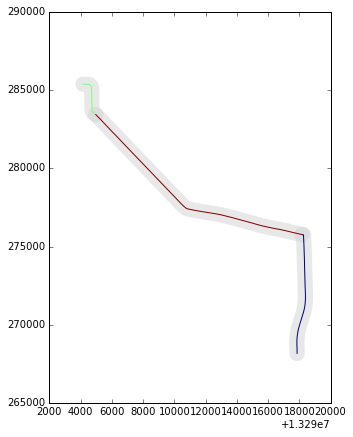

In [95]:
base = road_buffer.head(3).plot(figsize = (9, 7), color = "lightgrey", linewidth = 0)
road_prj.head(3).plot(ax = base)

### Buffer based on the distance given by column

In [96]:
road.RTTYP.value_counts() #road type counts

M    7342
U      28
S      18
O      12
I       8
Name: RTTYP, dtype: int64

In [97]:
RT_dist = {"M":100 ,"U":150, "S":200, "O":300, "I":400, None: 5}
road_prj["Distance"] = road_prj['RTTYP'].apply(lambda x: RT_dist[x])
road_buffer_bydist = gpd.GeoSeries(road_prj.apply(lambda x: x.geometry.buffer(x.Distance), axis=1))

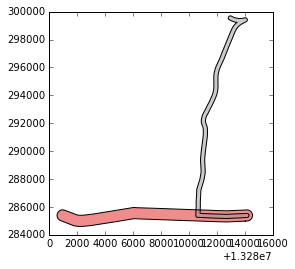

In [98]:
road_buffer_bydist[5:7].plot()

### Dissolve

We can aggregate GeoDataFrame with dissolve function, and we can also pass function to perform on columns to which we assign the new value. 

In [101]:
cols = ["GEOID", "Tract", "Total_Pop", "Pop_den"]
county_pop = tract_pop[cols].dissolve(by= tract_pop.GEOID.astype(np.int64) // 1000000, 
                                        aggfunc= {"Pop_den":np.mean, "Total_Pop":np.sum}
                                        )

(11500000.0, 14000000.0, 0.0, 2500000.0)

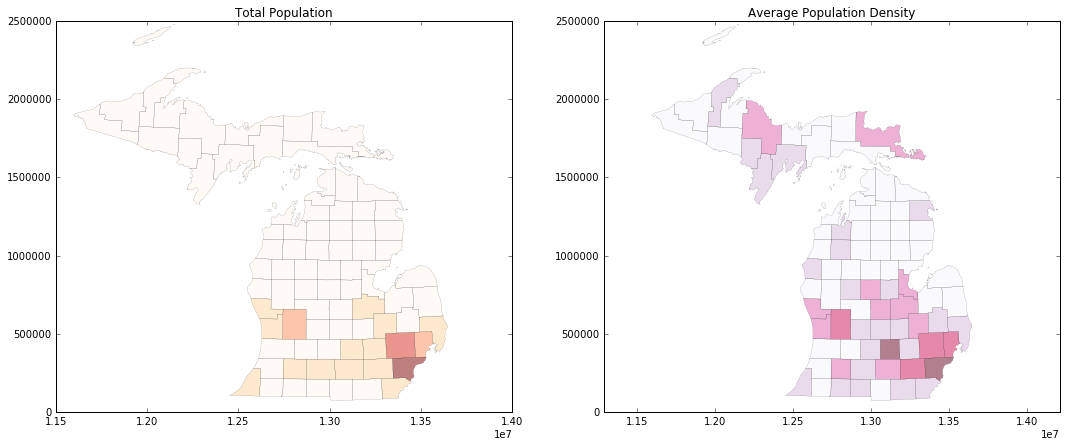

In [102]:
fig, ax0 = plt.subplots(1, 2, figsize = (18,7))
county_pop.plot(ax = ax0[0],
               column = "Total_Pop", 
               cmap = "OrRd", 
               scheme= "fisher_jenks", # other options including "fisher_jenks", "equal_interval"
               linewidth = 0.1, )

county_pop.plot(ax = ax0[1],
                column = "Pop_den",
                cmap = "PuRd",
                scheme = "fisher_jenks",
                linewidth = 0.1, 
                )
ax0[0].set_title("Total Population")
ax0[1].set_title("Average Population Density")
plt.axis("equal")

# Set-Operations 

When working with multiple spatial datasets – especially multiple polygon or line datasets – users often wish to create *new shapes* based on places where those datasets overlap (or don’t overlap). These geometric operations are often referred using the language of __sets – intersections, unions, and differences__.

<img src="overlay_operations.png">
__Source: QGIS Documentation__

We will use the floodplain data from Ann Arbor GIS data portal. http://www.a2gov.org/services/data/Pages/default.aspx

In [104]:
floodplain = gpd.read_file("AA_Floodplain/AA_Floodplain.shp")

In [105]:
#project 
floodplain_prj = floodplain.to_crs(crs) 

In [106]:
floodplain_prj.sample(3)

,OBJECTID,Shape_STAr,Shape_STLe,geometry
25,26,87280.514368,2967.849242,"POLYGON ((13290970.8370676 260451.4998006346, ..."
33,34,319592.687460,3807.324905,"POLYGON ((13309036.41150068 267534.31732788, 1..."
66,67,307089.699245,6351.855967,"POLYGON ((13289589.85032826 274268.3340435497,..."


(13180000.0, 13360000.0, 200000.0, 360000.0)

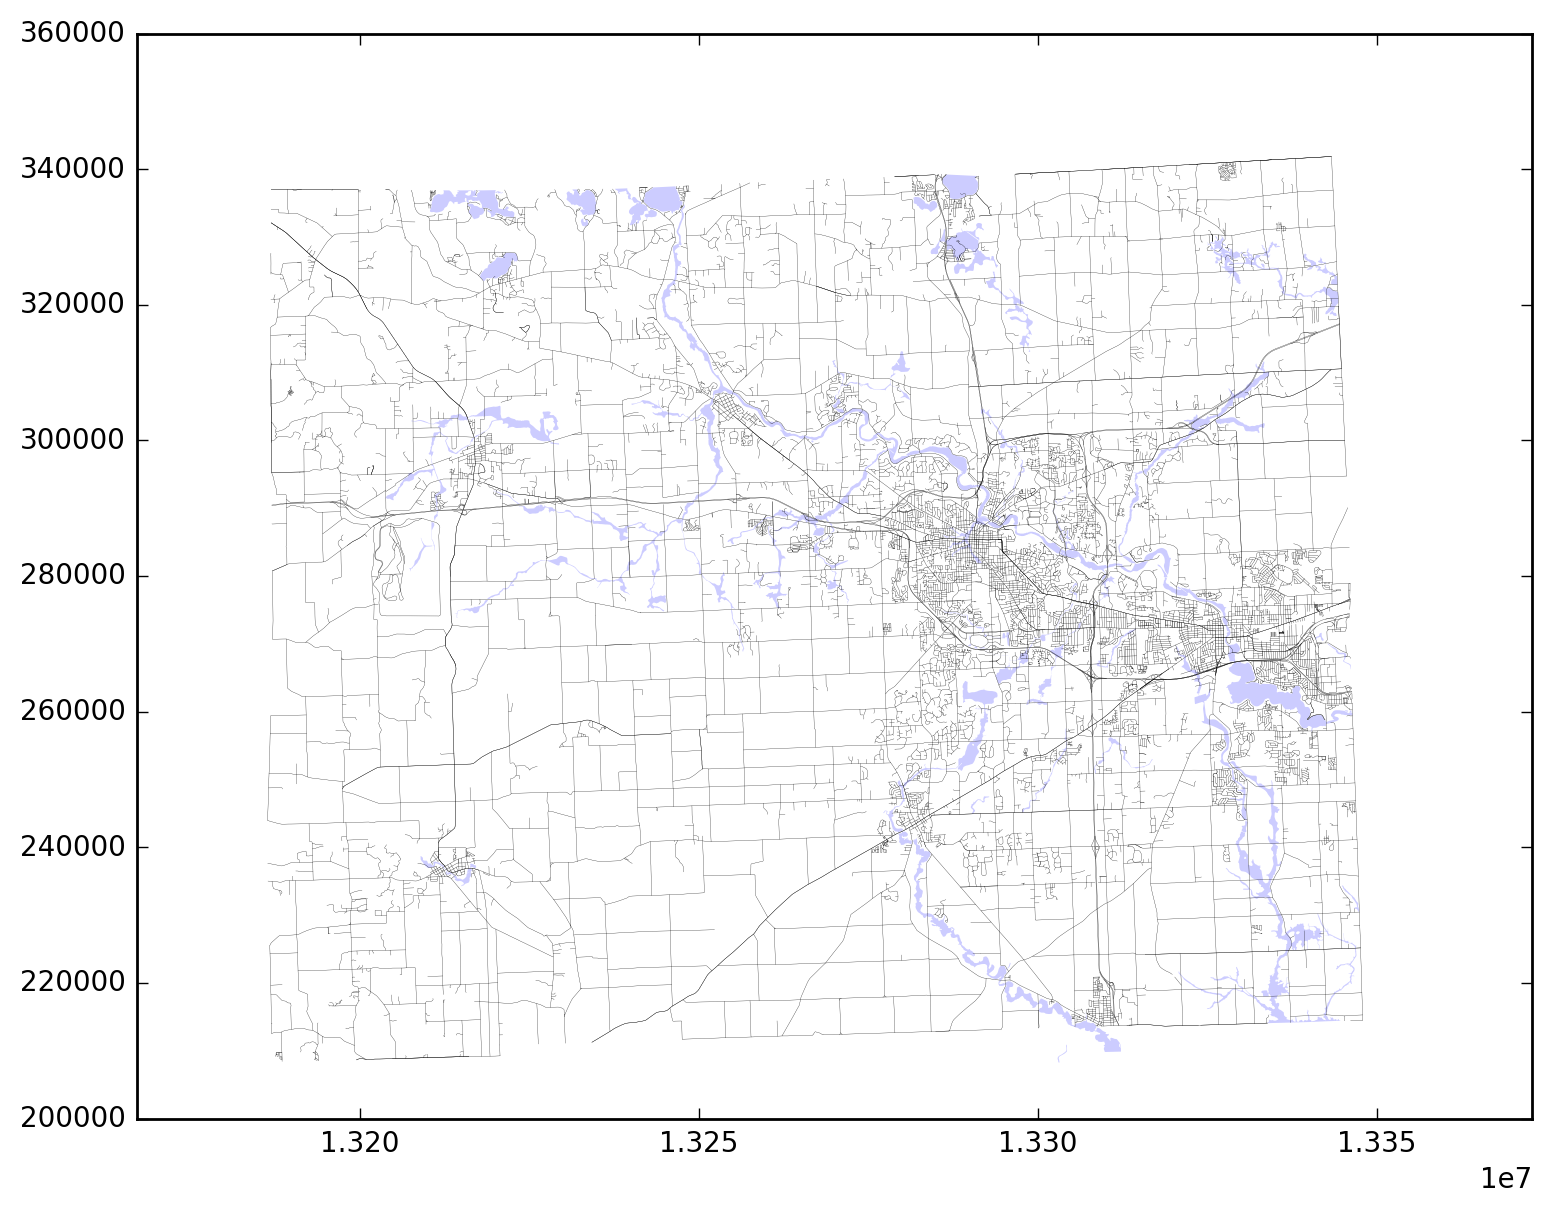

In [107]:
fig, axs = plt.subplots(1,1, figsize = (9, 7), dpi = 200)
floodplain_prj.plot(ax= axs, color = "blue", linewidth = 0, alpha = 0.2)
road_prj.plot(ax = axs, color = "black", linewidth = 0.1)
plt.axis("equal")

The floodplain intersects with some part of the roadway. Let's find out exactly where they are. 

In [108]:
road_union = road_buffer_bydist.unary_union

In [109]:
road_with_flood = floodplain_prj.intersection(road_union) # 

In [110]:
road_with_flood.shape

(142,)

(13180000.0, 13360000.0, 200000.0, 360000.0)

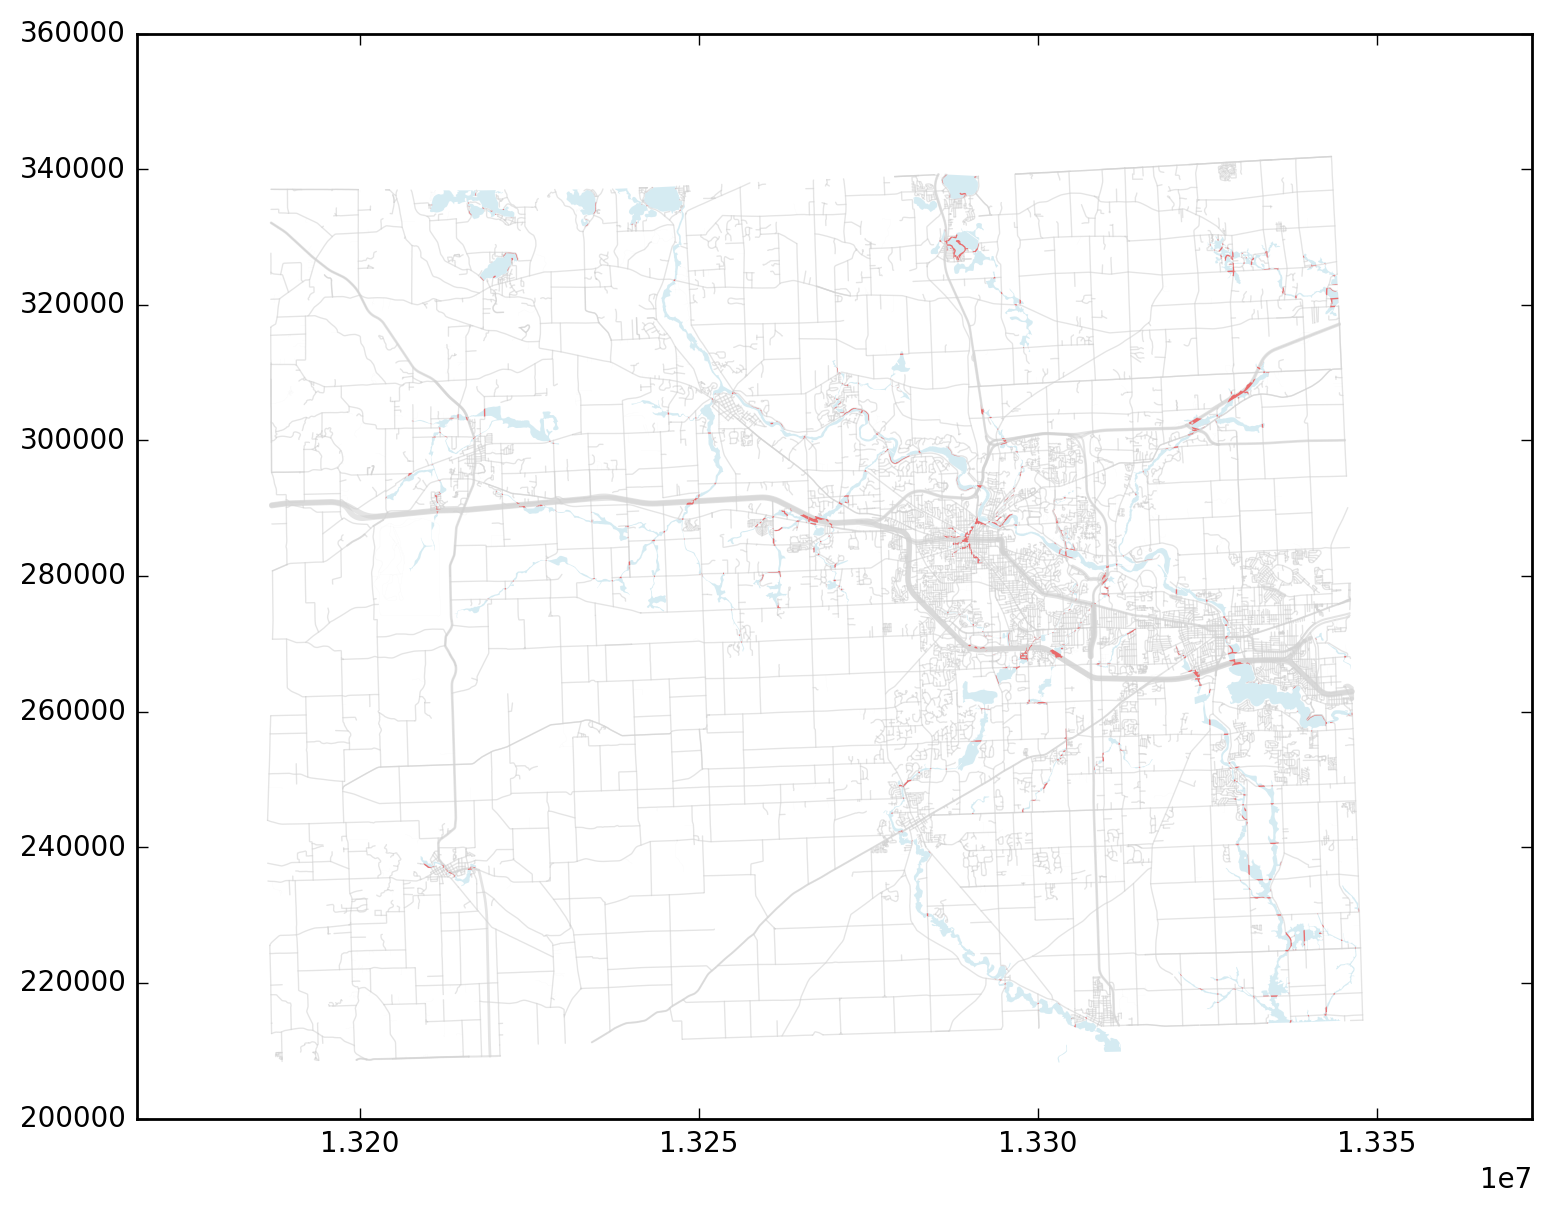

In [111]:
fig, axs = plt.subplots(1,1, figsize = (9, 7), dpi = 200)
floodplain_prj.plot(ax= axs, color = "lightblue", linewidth = 0, alpha = 0.5)
road_buffer_bydist.plot(ax = axs, linewidth = 0, color = "lightgrey", alpha = 0.6)
road_with_flood.plot(ax = axs, linewidth = 0, color = "red")
plt.axis("equal")

# Gecoding with geopy

Geocoding in GeoPandas is accomplished through geopy. 

geopy makes it easy for Python developers to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.

geopy includes geocoder classes for the __OpenStreetMap Nominatim, ESRI ArcGIS, Google Geocoding API (V3), Baidu Maps, Bing Maps API, Mapzen Search, Yandex, IGN France, GeoNames, NaviData, OpenMapQuest, What3Words, OpenCage, SmartyStreets, geocoder.us__, and __GeocodeFarm__ geocoder services. The various geocoder classes are located in __geopy.geocoders__.

In [112]:
import geopy
from geopy.geocoders import Nominatim

ImportError: No module named 'geopy'

In [ ]:
geolocator = Nominatim()
location = geolocator.geocode("2901 Baxter Rd, Ann Arbor")

To geolocate a query to an address and coordinates:



In [ ]:
location.address

In [ ]:
location.latitude, location.longitude

To find the address corresponding to a set of coordinates:



In [ ]:
location = geolocator.reverse("42.279725, -83.739268")

In [ ]:
print (location.address)

## Web mapping with geopandas and folium

In [113]:
import folium
import pysal as ps
from folium.plugins import MarkerCluster

Example mostly uses code from http://andrewgaidus.com/leaflet_webmaps_python/

In [114]:
crash_map = folium.Map([42.264768, -83.755503], 
                       zoom_start= 10)

In [115]:
def add_choropleth(mapobj, gdf, id_field, value_field, fill_color = 'GnBu', fill_opacity = 0.8, 
                    line_opacity = 0.2, num_classes = 5, classifier = 'Fisher_Jenks'):
    #Allow for 3 Pysal map classifiers to display data
    #Generate list of breakpoints using specified classification scheme. List of breakpoint will be input to choropleth function
    if classifier == 'Fisher_Jenks':
        threshold_scale=ps.esda.mapclassify.Fisher_Jenks(gdf[value_field], k = num_classes).bins.tolist()
    if classifier == 'Equal_Interval':
        threshold_scale=ps.esda.mapclassify.Equal_Interval(gdf[value_field], k = num_classes).bins.tolist()
    if classifier == 'Quantiles':
        threshold_scale=ps.esda.mapclassify.Quantiles(gdf[value_field], k = num_classes).bins.tolist()
    
    #Convert the GeoDataFrame to WGS84 coordinate reference system
    gdf_wgs84 = gdf.to_crs({'init': 'epsg:4326'})
    
    #Call Folium choropleth function, specifying the geometry as a the WGS84 dataframe converted to GeoJSON, the data as 
    #the GeoDataFrame, the columns as the user-specified id field and and value field.
    #key_on field refers to the id field within the GeoJSON string
    choropleth = mapobj.choropleth(geo_str = gdf_wgs84.to_json(), 
                                data = gdf,
                                columns = [id_field, value_field], key_on = 'feature.properties.{}'.format(id_field),
                                fill_color = fill_color, 
                                fill_opacity = fill_opacity, 
                                line_opacity = line_opacity,  
                                threshold_scale = threshold_scale)

    return mapobj

In [116]:
crash_map = add_choropleth(crash_map, crash_by_tract, "GEOID", "Crash_den")

In [117]:
crash_map

In [118]:
# add crash points cluster

In [119]:
def add_point_clusters(mapobj, gdf):
    #Create empty lists to contain the point coordinates and the point pop-up information
    coords = [] 
    #Loop through each record in the GeoDataFrame
    for i, row in gdf.iterrows():
        #Append lat and long coordinates to "coords" list
        coords.append([row.geometry.y, row.geometry.x])

    #Create a Folium feature group for this layer, since we will be displaying multiple layers
    crash_lyr = folium.FeatureGroup(name = 'Crashes')
    
    #Add the clustered points of crime locations and popups to this layer
    crash_lyr.add_child(MarkerCluster(locations = coords))
    
    #Add this point layer to the map object
    mapobj.add_child(crash_lyr)
    return mapobj

In [120]:
crash_unproj = crash_wash.to_crs(crash_df.crs)

In [121]:
crash_map = add_point_clusters(crash_map, crash_unproj.sample(300))

In [122]:
folium.LayerControl().add_to(crash_map)

In [123]:
crash_map

In [125]:
crash_map.save("crash_map.html") #save the map to html